**K - Means Clustering by calculating Silhouette score**

In [1]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import io    #import important libraries initially
import csv
import pandas as pd

In [3]:
#Installation of Spark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null  

In [4]:
#Get Spark Installer
!wget -q www-us.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz

In [5]:
#Unzip Spark Installer folder
!tar -xvf spark-3.1.1-bin-hadoop3.2.tgz

spark-3.1.1-bin-hadoop3.2/
spark-3.1.1-bin-hadoop3.2/NOTICE
spark-3.1.1-bin-hadoop3.2/kubernetes/
spark-3.1.1-bin-hadoop3.2/kubernetes/tests/
spark-3.1.1-bin-hadoop3.2/kubernetes/tests/python_executable_check.py
spark-3.1.1-bin-hadoop3.2/kubernetes/tests/autoscale.py
spark-3.1.1-bin-hadoop3.2/kubernetes/tests/worker_memory_check.py
spark-3.1.1-bin-hadoop3.2/kubernetes/tests/py_container_checks.py
spark-3.1.1-bin-hadoop3.2/kubernetes/tests/decommissioning.py
spark-3.1.1-bin-hadoop3.2/kubernetes/tests/pyfiles.py
spark-3.1.1-bin-hadoop3.2/kubernetes/tests/decommissioning_cleanup.py
spark-3.1.1-bin-hadoop3.2/kubernetes/dockerfiles/
spark-3.1.1-bin-hadoop3.2/kubernetes/dockerfiles/spark/
spark-3.1.1-bin-hadoop3.2/kubernetes/dockerfiles/spark/decom.sh
spark-3.1.1-bin-hadoop3.2/kubernetes/dockerfiles/spark/entrypoint.sh
spark-3.1.1-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/
spark-3.1.1-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/R/
spark-3.1.1-bin-hadoop3.2/kubernetes/docker

In [6]:
#Python library to find Spark - findspark
!pip install -q findspark   

In [7]:
#Setting enviornment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [8]:
#Create local Spark session
import findspark
findspark.init()
from pyspark.sql import SparkSession
local_spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql.types import IntegerType

In [9]:
#Importing pyspark sql functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
from pylab import show
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

In [11]:
# Loading data
# some modifications were made by converting the data file to csv before loading to Python
df = local_spark.read.format("csv").option("header","true").load("/content/drive/MyDrive/Big Data Analytics/iris.csv")

In [14]:
type("SepalLength")

str

In [13]:
# The values of the columns mentioned are in string and vectorassembler will not be supported hence converting 
iris_df = df.selectExpr("cast(SepalLength as Double) SepalLength", "cast(SepalWidth as Double) SepalWidth", "cast(PetalLength as Double) PetalLength", "cast(PetalWidth as Double) PetalWidth", "Variety" )

In [15]:
iris_df.show(10)

+-----------+----------+-----------+----------+-------+
|SepalLength|SepalWidth|PetalLength|PetalWidth|Variety|
+-----------+----------+-----------+----------+-------+
|        5.1|       3.5|        1.4|       0.2| Setosa|
|        4.9|       3.0|        1.4|       0.2| Setosa|
|        4.7|       3.2|        1.3|       0.2| Setosa|
|        4.6|       3.1|        1.5|       0.2| Setosa|
|        5.0|       3.6|        1.4|       0.2| Setosa|
|        5.4|       3.9|        1.7|       0.4| Setosa|
|        4.6|       3.4|        1.4|       0.3| Setosa|
|        5.0|       3.4|        1.5|       0.2| Setosa|
|        4.4|       2.9|        1.4|       0.2| Setosa|
|        4.9|       3.1|        1.5|       0.1| Setosa|
+-----------+----------+-----------+----------+-------+
only showing top 10 rows



In [16]:
#Importing k means library
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [18]:
#Importing VectorAssembler
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [19]:
#Below query makes a vector with 4 parameters mentioned in input columns and names it as output column
assembler = VectorAssembler(inputCols = ["SepalLength", "SepalWidth","PetalLength", "PetalWidth"], outputCol="features") 

In [20]:
#This will add to the table outputCol column with vectors
Iris_Features = assembler.transform(iris_df)
Iris_Features.show(5)

+-----------+----------+-----------+----------+-------+-----------------+
|SepalLength|SepalWidth|PetalLength|PetalWidth|Variety|         features|
+-----------+----------+-----------+----------+-------+-----------------+
|        5.1|       3.5|        1.4|       0.2| Setosa|[5.1,3.5,1.4,0.2]|
|        4.9|       3.0|        1.4|       0.2| Setosa|[4.9,3.0,1.4,0.2]|
|        4.7|       3.2|        1.3|       0.2| Setosa|[4.7,3.2,1.3,0.2]|
|        4.6|       3.1|        1.5|       0.2| Setosa|[4.6,3.1,1.5,0.2]|
|        5.0|       3.6|        1.4|       0.2| Setosa|[5.0,3.6,1.4,0.2]|
+-----------+----------+-----------+----------+-------+-----------------+
only showing top 5 rows



In [21]:
#Training k-means model with k value = 2
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(Iris_Features)

In [22]:
#Making predictions
predictions = model.transform(Iris_Features)
predictions.show()
evaluator = ClusteringEvaluator()

+-----------+----------+-----------+----------+-------+-----------------+----------+
|SepalLength|SepalWidth|PetalLength|PetalWidth|Variety|         features|prediction|
+-----------+----------+-----------+----------+-------+-----------------+----------+
|        5.1|       3.5|        1.4|       0.2| Setosa|[5.1,3.5,1.4,0.2]|         1|
|        4.9|       3.0|        1.4|       0.2| Setosa|[4.9,3.0,1.4,0.2]|         1|
|        4.7|       3.2|        1.3|       0.2| Setosa|[4.7,3.2,1.3,0.2]|         1|
|        4.6|       3.1|        1.5|       0.2| Setosa|[4.6,3.1,1.5,0.2]|         1|
|        5.0|       3.6|        1.4|       0.2| Setosa|[5.0,3.6,1.4,0.2]|         1|
|        5.4|       3.9|        1.7|       0.4| Setosa|[5.4,3.9,1.7,0.4]|         1|
|        4.6|       3.4|        1.4|       0.3| Setosa|[4.6,3.4,1.4,0.3]|         1|
|        5.0|       3.4|        1.5|       0.2| Setosa|[5.0,3.4,1.5,0.2]|         1|
|        4.4|       2.9|        1.4|       0.2| Setosa|[4.4,2.9,1

In [23]:
#Calculating Silhouette score
silhouette = evaluator.evaluate(predictions)

In [24]:
silhouette

0.850351222925146

In [27]:
#Try to improve the performance of the original model by trying at least 10 different k values based on silhouette score
kvals = [2,3,4,5,6,7,8,9,10,11]
silho = []

for k in kvals:
  kmeans = KMeans().setK(k).setSeed(1)
  model = kmeans.fit(Iris_Features)
  predictions = model.transform(Iris_Features)
  evaluator = ClusteringEvaluator()
  silhouette = evaluator.evaluate(predictions)
  print(f'for k: {k} silhouette: {silhouette}')
  silho.append(silhouette)

for k: 2 silhouette: 0.850351222925146
for k: 3 silhouette: 0.7356596054332228
for k: 4 silhouette: 0.6722537284209328
for k: 5 silhouette: 0.615835261889785
for k: 6 silhouette: 0.5479277763909295
for k: 7 silhouette: 0.4894497915074385
for k: 8 silhouette: 0.5081942318036387
for k: 9 silhouette: 0.5173263235949097
for k: 10 silhouette: 0.602017785815667
for k: 11 silhouette: 0.4147643183822156
for k: 12 silhouette: 0.4112910093796243


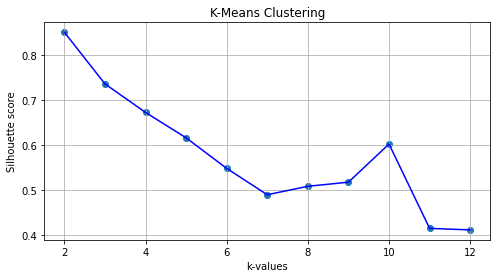

k = 2 gives the best performance, Silhouette = 0.850351222925146


In [29]:
#Show the k values in a plot with k values on x axis and silhouette score on the y axis
kplot = mp.figure(figsize=(8,4))
mp.grid()
mp.plot(kvals,silho, c='blue')
mp.scatter(kvals,silho)
mp.title('K-Means Clustering')
mp.xlabel("k-values")
mp.ylabel("Silhouette score")
show()

max_silho = max(silho)    # calculating maximum silhoutte value for particular k-value obtained
index = silho.index(max_silho)
max_kval = kvals[index]
print(f'k = {max_kval} gives the best performance, Silhouette = {max_silho}') 